In [29]:
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 

In [30]:
irrigation_machine = pd.read_csv('./../../Data/irrigation_machine.csv')
sensor_readings = irrigation_machine.drop(['parcel_0', 'parcel_1','parcel_2'], axis=1)
sensor_readings = sensor_readings.drop(sensor_readings.columns[0], axis=1)
y = irrigation_machine[['parcel_0', 'parcel_1','parcel_2']]
# Normalize sensor readings
scaler = StandardScaler()
sensor_readings = scaler.fit_transform(sensor_readings)
sensors_train,sensors_test, parcels_train, parcels_test = train_test_split(sensor_readings,y,test_size=0.2, random_state=42)

In [31]:
model = Sequential()

model.add(Dense(64, input_shape=(sensor_readings.shape[1],), activation='relu'))

model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5370 - loss: 0.6389 - val_accuracy: 0.6156 - val_loss: 0.5108
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6404 - loss: 0.4763 - val_accuracy: 0.5844 - val_loss: 0.4151
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 0.3963 - val_accuracy: 0.5969 - val_loss: 0.3612
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 0.3570 - val_accuracy: 0.5938 - val_loss: 0.3261
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.3168 - val_accuracy: 0.6094 - val_loss: 0.3013
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6637 - loss: 0.2900 - val_accuracy: 0.6125 - val_loss: 0.2831
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6565 - loss: 0.2806 - val_accuracy: 0.6125 - val_loss: 0.2703
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6316 - loss: 0.2648 - val_accuracy: 0.6187 - v

Implementing callbacks

In [33]:
# import seaborn as sns
# import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import numpy as np 

irrigation_machine = pd.read_csv('./../../Data/irrigation_machine.csv')
sensor_readings = irrigation_machine.drop(['parcel_0', 'parcel_1','parcel_2'], axis=1)
sensor_readings = sensor_readings.drop(sensor_readings.columns[0], axis=1)
y = irrigation_machine[['parcel_0', 'parcel_1','parcel_2']]
# Normalize sensor readings
scaler = StandardScaler()
sensor_readings = scaler.fit_transform(sensor_readings)
sensors_train,sensors_test, parcels_train, parcels_test = train_test_split(sensor_readings,y,test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(64, input_shape=(sensor_readings.shape[1],), activation='relu'))

model.add(Dense(3, activation='sigmoid'))

model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539 (6.01 KB)

 Trainable params: 1,539 (6.01 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6466 - loss: 0.5946 - val_accuracy: 0.6250 - val_loss: 0.4590
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 0.4482 - val_accuracy: 0.6125 - val_loss: 0.3752
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6037 - loss: 0.3769 - val_accuracy: 0.6200 - val_loss: 0.3231
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.3153 - val_accuracy: 0.6250 - val_loss: 0.2896
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6134 - loss: 0.2876 - val_accuracy: 0.6175 - val_loss: 0.2680
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.2695 - val_accuracy: 0.6200 - val_loss: 0.2542
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6195 - loss: 0.2476 - val_accuracy: 0.6125 - val_loss: 0.2443
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 0.2388 - val_accuracy: 0.6200 - val_loss:

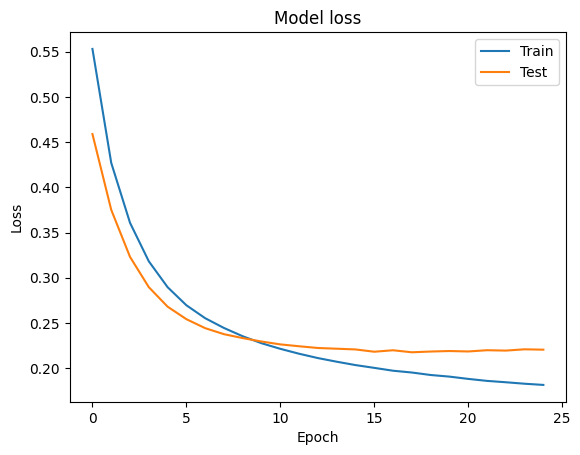

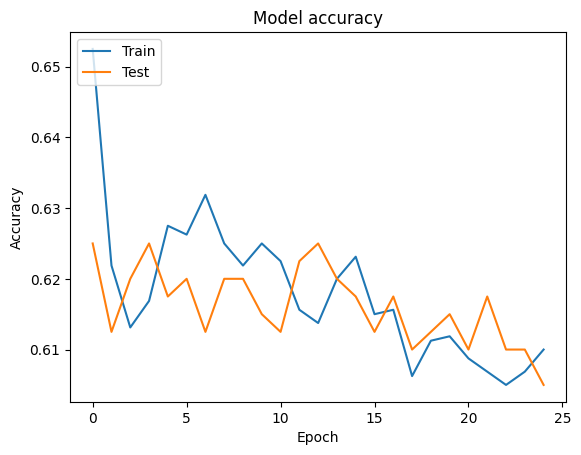

In [35]:


# Train for 100 epochs using a validation split of 0.2
h_callback=model.fit(sensors_train, parcels_train, epochs = 25, validation_data=(sensors_test,parcels_test))


# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [36]:
def get_model(act):
    mod = Sequential()

    mod.add(Dense(64, input_shape=(sensor_readings.shape[1],), activation=act))

    mod.add(Dense(3, activation='sigmoid'))

    mod.compile(optimizer='adam',
            loss = 'binary_crossentropy',
            metrics=['accuracy'])
    
    return mod





In [39]:
# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}
for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model and store the history results
  h_callback = model.fit(sensors_train,parcels_train, epochs=100, validation_data=(sensors_test, parcels_test), verbose=0)
  activation_results[act] = h_callback

c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Shadow\anaconda3\envs\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=

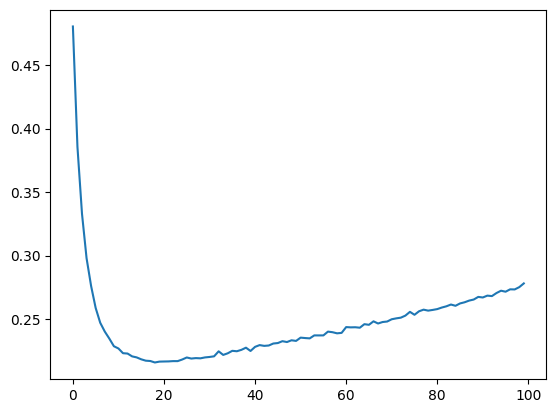

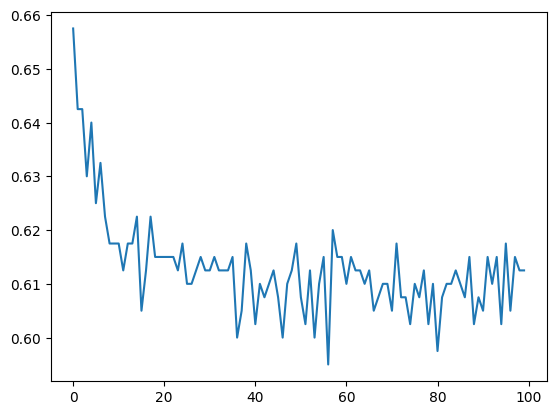

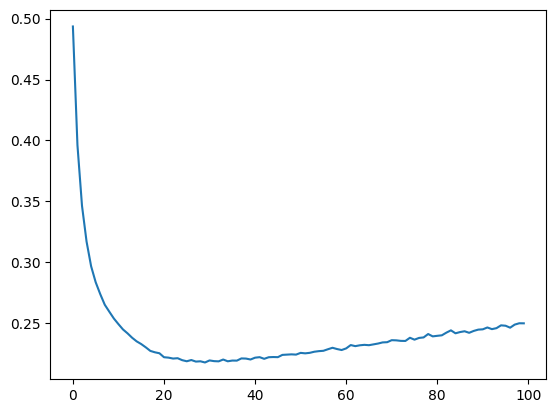

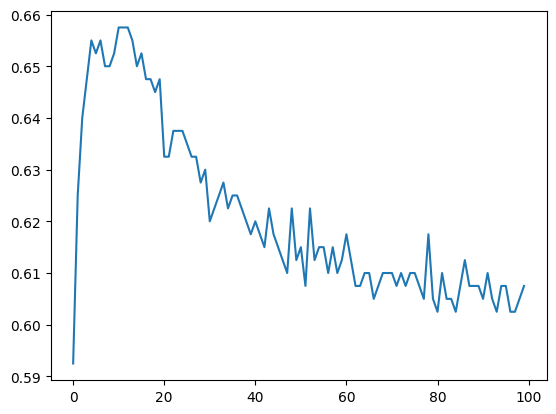

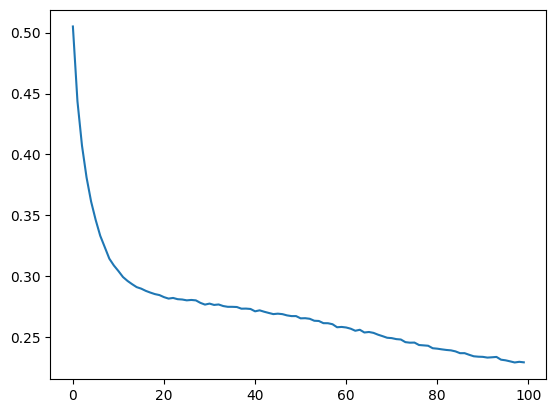

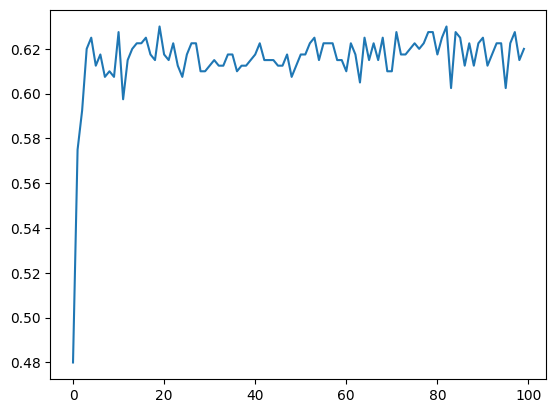

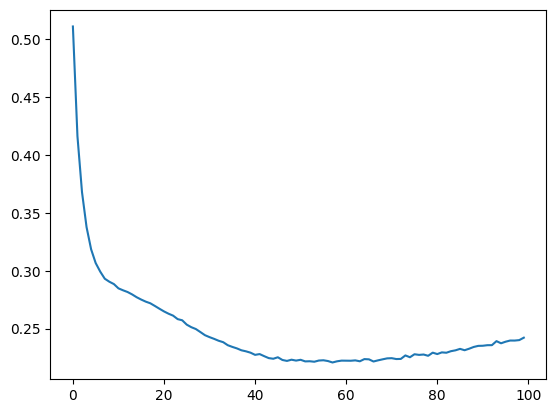

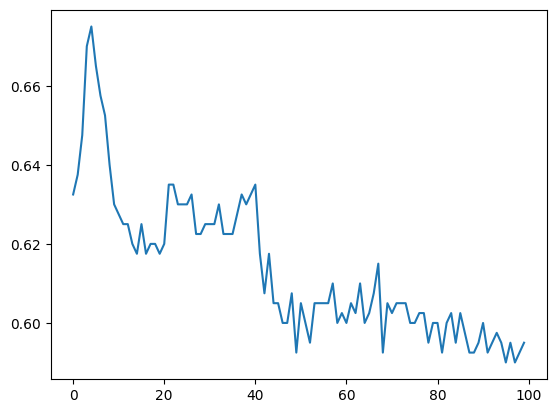

In [45]:

for act in activation_results.keys():
    val_loss_per_function=activation_results[act].history['val_loss']

    val_acc_per_function=activation_results[act].history['val_accuracy']

    # Create a dataframe from val_loss_per_function
    val_loss= pd.DataFrame(val_loss_per_function)

        # Call plot on the dataframe
    plt.plot(val_loss)
    plt.show()

        # Create a dataframe from val_acc_per_function
    val_acc = pd.DataFrame(val_acc_per_function)

    # Call plot on the dataframe
    plt.plot(val_acc)
    plt.show()